In [6]:
#importing all the essential libraries used in code
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#defining a sum for initial to ith index in a lisy, will be used for simple moving average
def sum_i(a,i):
    s=0
    for x in range(i+1):
        s+=a[x]
    return s

In [8]:
#extracting data of the stock 'SBI' from yfinance, and making an array of closing values
sbi=yf.Ticker('SBIN.NS')

df = sbi.history(start="2023-01-01",end ="2023-04-01")
df2 = df[['Close']]
close=df2.to_numpy()

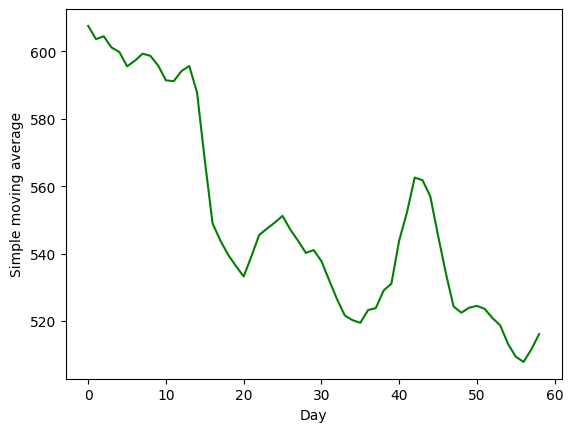

In [9]:
#calculating and plotting simple moving average
sma=[]
day_sma=[]

for i in range (0,59):
    sma.append((sum_i(close,i+3)-sum_i(close,i))/3)

for j in range(0,59):
    day_sma.append(j)

fig,axes=plt.subplots()

axes.plot(day_sma,sma,'green')
axes.set_xlabel('Day')
axes.set_ylabel('Simple moving average')
plt.show()

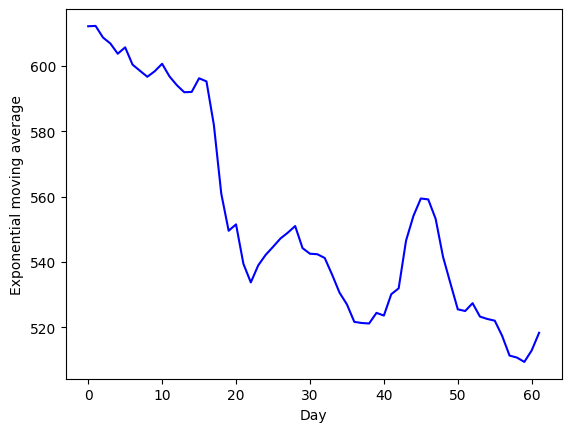

In [10]:
#calculating and plotting exponential moving average.
ema=[]
ema.append(close[0])

smoothing=2
days=3

for i in range(1,62):
    ema.append(close[i]*(smoothing/(1+days))+ema[i-1]*(1-(smoothing/(1+days))))

ema_day=[]

for i in range(62):
    ema_day.append(i)

fig,axes=plt.subplots()
axes.plot(ema_day,ema,'blue')
axes.set_xlabel('Day')
axes.set_ylabel('Exponential moving average')
plt.show()